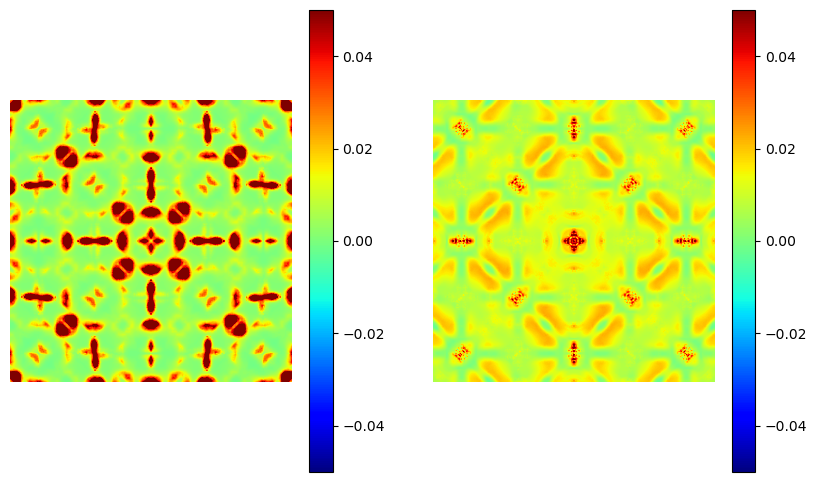

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm
from scipy.interpolate import griddata
from matplotlib.pyplot import cm


### load data
qr = np.loadtxt('qrange.dat') # range of q
qedge = np.max(qr) # the edge of qr
diq = np.loadtxt('diffuse_scattering_signal.dat') # change in signal at 1 and 20 ps
qcoord = np.loadtxt('qplot.dat') # q in Cartesian coordinates 

# interpolate picture on a fine grid
grid_x, grid_y = np.mgrid[-qedge:qedge:300j, -qedge:qedge:300j] 

### plot
fig, axes = plt.subplots(1, 2, figsize=(10,6))
norm = CenteredNorm(vcenter=0, halfrange=0.05)
cmap = cm.jet
for i in range(2):
    diq_f = griddata((qcoord[:,0], qcoord[:,1]), diq[i, :], (grid_x, grid_y), method='cubic')
    ax = axes[i]
    mesh = ax.imshow(diq_f, norm=norm, cmap=cmap, origin='lower', extent=(-qedge, qedge, -qedge, qedge), interpolation='gaussian')
    fig.colorbar(mesh, ax=ax)
    ax.set_frame_on(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    ax.axis('equal')